In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist

2023-10-25 18:21:17.363928: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 18:21:17.421069: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 18:21:17.421634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 18:21:18.978736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Загружаем данные функцией load_data из названия нашего датасета mnist и разделяем наш датасет на тренировочную выборку и тестовую.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Выводим 12 изображение из массива, и это цифра 3

(-0.5, 27.5, 27.5, -0.5)

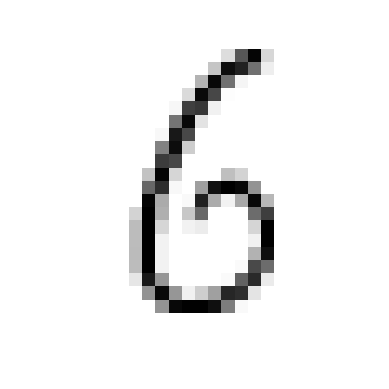

In [3]:
plt.imshow(X_train[18], cmap='binary')
plt.axis('off')
# print(y_train[16])

Как вы все знаете, значение пикселя может быть от 0 до 255, и если мы будем подавать в нейронную сеть такие данные. Пиксель со значением 0 и пиксель со значением 255 имеют очень разные масштабы значений. Нам очень тяжело будет учить модель.

И чтобы их "нормировать", чтобы они были от 0 до 1 в идеале, мы разделим все наше "добро" на 255.

0 / 255 = 0 , 255 / 255 = 1, а любое число в диапазоне от 0 не до 255 будет просто дробью.

In [11]:
X_train = X_train/255
X_test = X_test/255
print(y_train[0])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


нельзя дать нейронке фото и сказать что это цифра 4, нужно это значение "векторизировать", это делается вот так:

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Теперь давайте напишем саму модель нейронной сети.
Инициализируем нашу модель.

In [12]:
model = Sequential()

Дальше создаем наш первый слой, в нём будет 32 нейрона, также нужно указать форму входимых данных.

In [13]:
model.add(Dense(32, activation='relu', input_shape=(X_train[0].shape)))

Ещё дальше создаем 4 нейрона с такой же функцией активации.

In [14]:
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))

Мы вытягиваем данные в вектор.

In [15]:
model.add(Flatten())

И тут мы сравниваем вектор с вектором, по сути это так.

In [16]:
model.add(Dense(10, activation='sigmoid'))

Тут компилируем нашу модель, оптимайзер - адам, потому-что он очень "классный", "categorical_crossentropy" - т.к мы определяем категории объектов.

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Теперь тренируем модель:

In [18]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


2023-10-21 09:37:23.404791: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


ValueError: in user code:

    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 10, 10) and (32, 10) are incompatible


In [ ]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


2023-10-21 09:37:23.404791: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


ValueError: in user code:

    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/misha/Python/magistr/env/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 10, 10) and (32, 10) are incompatible
